<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

In [654]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

The numpy library is used to handle matrixes.

Matplotlib to plot and handle the plots of the data.

Sklearn used for the regression and Kfold validation.

In [655]:
GPUBenchmark = np.genfromtxt('GPUBenchmark.csv', delimiter=',') # Read the GPUBenchmark.csv file.
GPUBenchmarkY = GPUBenchmark[:, 6]          # Read all Y-values, and add to np-array.
GPUBenchmarkX = GPUBenchmark[:, 0:6]        # Read all X-values, and add to np-array.
p = len(GPUBenchmarkX[0])  # Length of features.

The needed datas are set here. 

The GPUBenchmark.csv file is read using np.genfromtx.

The data is split into X-features and Y-labels.

The variables n and p are created. n = rows and p = columns.

<b> Exercise 6.1: Implement the forward selection algorithm as discussed in Lecture 6  </b>

In [656]:

linearReg = LinearRegression()  # Used for the regression prediction of the labels.
features = list(range(p))       # Available features that will be used. 0 to p-1.
result = []                     # Array holdning the best results.
for x in range(p): 
    MSE =[]  # Array holding current cost function reults, with index.
    for i in features:
        concateFeature = np.hstack((result,[i])).astype(int)                               # Concatenate current features with current result
        currentX = GPUBenchmarkX[:, concateFeature]                                        # Change current model used for prediction.
        linearReg.fit(currentX, GPUBenchmarkY)                                             # Fit current model with the labels.
        predictY = linearReg.predict(currentX)                                             # Predict the new Y's using the current model.
        beta = np.linalg.inv(currentX.T.dot(currentX)).dot(currentX.T).dot(GPUBenchmarkY)  # Find the current betas for the predicted model.

        #Create the cost function, and calculate the cost.
        j = np.dot(currentX,beta)-predictY        #Createing the cost function J(β).
        cost =  (j.T.dot(j))/len(currentX)        #Calculating the cost...
        MSE.append(cost)                          # Append the current cost to the MSE array.
   
    minimumIndex = MSE.index(min(MSE))      # Find index of minimum cost value.
    bestFeature = features[minimumIndex]    # Use the index of the minimum cost to find the best feature.
    result.append(bestFeature)              # Append the minimum value to the results. The current best feature.
    features.pop(minimumIndex)              # Removes the current best feature using the minimum cost-index.
    print(result)                           # Print result.
print('Best model: ' + str(result))         # Return the result containing the best features values.

[0]
[0, 4]
[0, 4, 5]
[0, 4, 5, 3]
[0, 4, 5, 3, 1]
[0, 4, 5, 3, 1, 2]
Best model: [0, 4, 5, 3, 1, 2]


Here we see the best model based on amount of features.

<b> Exercise 6.2: Apply your forward selection on the GPUbenchmark.csv. </b>

In [657]:
Xne = []                                                                          # Array holding the corresponing features values.
for i in range(p):                                                                # Transfer 
    Xne.append(GPUBenchmarkX[:, result[i]])                                         # Append all the features at result index to Xne-array.
Xne = np.array(Xne).T                                                               # Transpose the Xne-matrix with index values.
valError = []                                                                       # Holding the  valdation errors from the results.
k= KFold(n_splits=3)                                                                    # Set k-Fold splits to 3.
for i in range(p):
    xneTest = Xne[:,:i+1]                                                               # Gather the x-features up to current i.
    linearReg = LinearRegression(fit_intercept = True, normalize = True)                # Prepeare model.
    predictionY = cross_val_predict(linearReg, xneTest, GPUBenchmarkY, cv=k)            # Predict the model with cross_val_predict.
    MSE = ((predictionY-GPUBenchmarkY)**2).mean()                                       # Count the current error.
    valError.append(MSE)                                                                # Append error to array.
bestIndex = valError.index(min(valError))+1                                             # Get the index of the best features.

<b> Which is the best model? </b>

The best number of features is 5


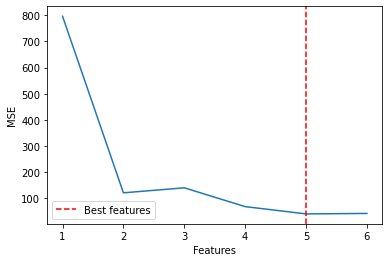

In [658]:
print("The best number of features is "+str(result[result.index(bestIndex)]))        # Print the best number of features based on results.
fig, ax = plt.subplots()
ax.plot(list(range(1,7)), valError, '-')                                    
ax.axvline(bestIndex, linestyle = '--', label = 'Best features', c='r')              # Plot vertical line on the best features. 
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('MSE')
plt.show()                                                                          # Show plot.

As we can the the mean square error decreases with the number of features. Though we see that three features has a worth fit than 2 features.

We can also see that a model with 6 features is very close to 5 in terms of MSE. With this said, we do know that 5 features is more simple than 6 features.

The best model to use is here is a model with 5 features. This since it has the least mean square error (MSE) with three fold valdtation gives that. This is also the simplest compared to feature 6.